In [1]:
import pandas as pd
a
# Load the data
data = pd.read_csv('Accommodation.CSV')

In [2]:
# Display the first few rows
data.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),NaN,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,NaN,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Flemings White Bridge Caravan and Camping,NaN,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Republic of Ireland,Camping


In [3]:
# Get information about the columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2339 non-null   object 
 1   Url              2170 non-null   object 
 2   Telephone        2335 non-null   object 
 3   Longitude        2339 non-null   float64
 4   Latitude         2339 non-null   float64
 5   AddressRegion    2339 non-null   object 
 6   AddressLocality  2176 non-null   object 
 7   AddressCountry   2339 non-null   object 
 8   Tags             2339 non-null   object 
dtypes: float64(2), object(7)
memory usage: 164.6+ KB


In [4]:
# Check for missing values
data.isnull().sum()

Name                 0
Url                169
Telephone            4
Longitude            0
Latitude             0
AddressRegion        0
AddressLocality    163
AddressCountry       0
Tags                 0
dtype: int64

In [5]:
# Fill missing values in the 'Telephone' column with a placeholder value
data['Telephone'].fillna('Not Available', inplace=True)

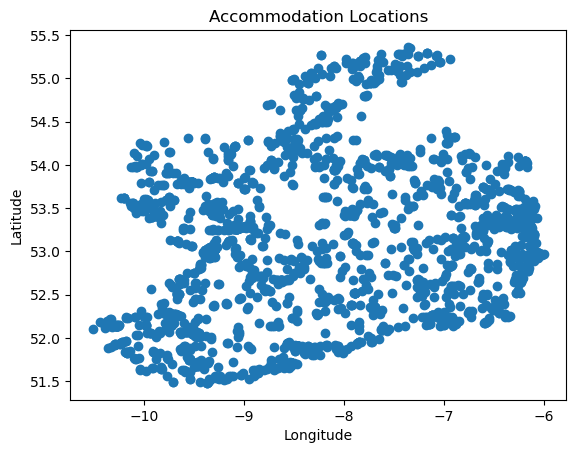

In [6]:
import matplotlib.pyplot as plt

# Plot latitude vs longitude
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accommodation Locations')
plt.show()

In [7]:
# Distribution of Accommodations by Region
region_counts = data['AddressRegion'].value_counts()
print("Distribution of Accommodations by Region:")
print(region_counts)

Distribution of Accommodations by Region:
AddressRegion
Kerry        308
Cork         252
Galway       243
Dublin       234
Donegal      178
Clare        156
Mayo         143
Wexford       82
Tipperary     74
Wicklow       73
Meath         61
Waterford     59
Limerick      57
Sligo         55
Kildare       50
Kilkenny      49
Cavan         41
Leitrim       37
Westmeath     35
Louth         34
Monaghan      24
Roscommon     24
Offaly        21
Carlow        21
Laois         20
Longford       8
Name: count, dtype: int64


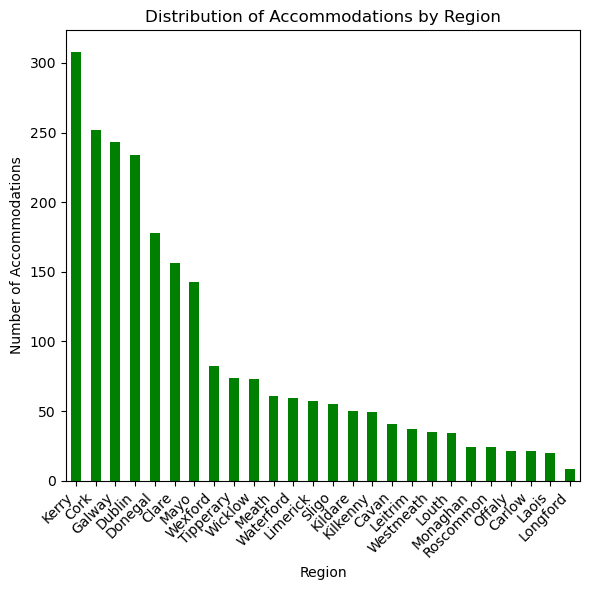

In [8]:
import matplotlib.pyplot as plt

# Plot distribution of accommodations by region
plt.figure(figsize=(6, 6))
region_counts.plot(kind='bar', color='green')
plt.title('Distribution of Accommodations by Region')
plt.xlabel('Region')
plt.ylabel('Number of Accommodations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Common Tags Associated with Accommodations
tags = data['Tags'].str.split(',').explode().str.strip()
tag_counts = tags.value_counts()
print("\nCommon Tags Associated with Accommodations:")
print(tag_counts.head(10))  # Display top 10 most common tags


Common Tags Associated with Accommodations:
Tags
Hotel                          810
B&B                            722
Self Catering Accommodation    512
Welcome Standard               495
Camping                        132
Guesthouse                     104
B&B Ireland                     77
Hostel                          73
Glamping                        34
B&Bs                            28
Name: count, dtype: int64


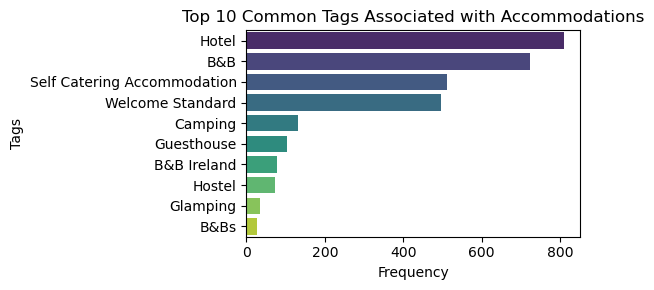

In [10]:
import seaborn as sns

# Plot common tags associated with accommodations
plt.figure(figsize=(6, 3))
sns.barplot(x=tag_counts.head(10).values, y=tag_counts.head(10).index, palette='viridis')
plt.title('Top 10 Common Tags Associated with Accommodations')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()

In [11]:
# Summary Statistics
summary_stats = data[['Longitude', 'Latitude']].describe()
print("\nSummary Statistics for Longitude and Latitude:")
print(summary_stats)


Summary Statistics for Longitude and Latitude:
         Longitude     Latitude
count  2339.000000  2339.000000
mean     -8.208845    53.069696
std       1.283439     0.905482
min     -10.514531    51.479594
25%      -9.374312    52.261228
50%      -8.436704    53.122920
75%      -7.023236    53.594261
max      -5.998080    55.361922


In [12]:
# Extract top-level domains (TLDs)
tlds = data['Url'].apply(lambda x: str(x).split('.')[-1] if (pd.notnull(x) and len(str(x).split('.')) > 1) else None)
tld_counts = tlds.value_counts()
print("Top-Level Domain Frequencies:")
print(tld_counts)

Top-Level Domain Frequencies:
Url
com                                      751
com/                                     330
ie                                       314
ie/                                      216
html                                      45
                                        ... 
com/buncrana/millbrae-townhouse            1
com/buncrana/white-strand-beach-house      1
com/themartellobray?fref=ts                1
com/stationhouselk                         1
teelin/                                    1
Name: count, Length: 469, dtype: int64


C:\Users\Global\AppData\Local\Temp\ipykernel_13192\1614855598.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


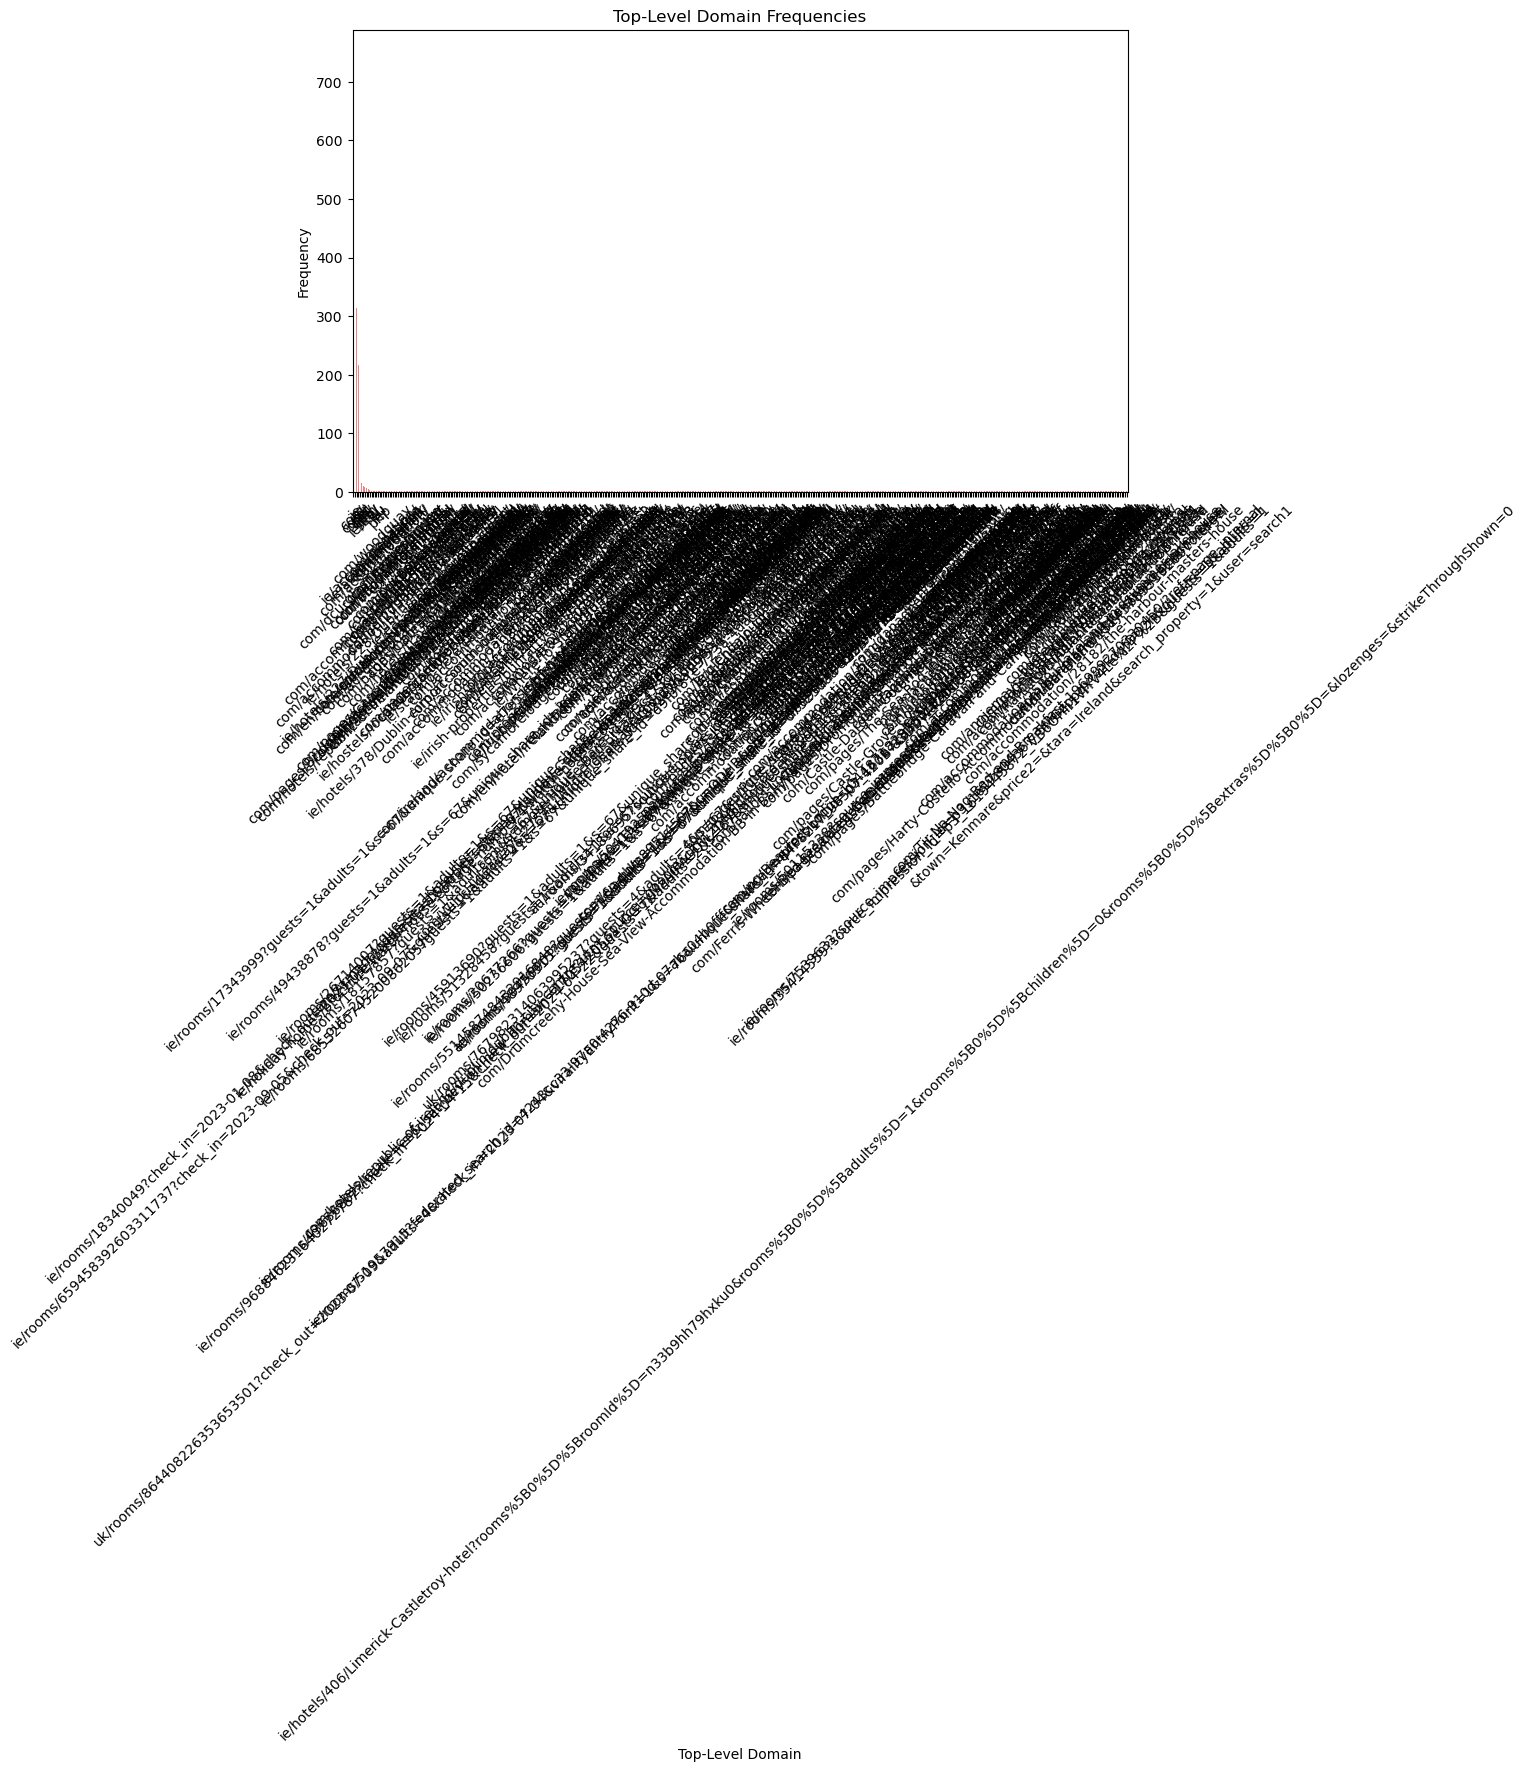

In [13]:
import matplotlib.pyplot as plt

# Assuming 'tld_counts' is the Series containing TLD frequencies

# Plotting
plt.figure(figsize=(10, 6))
tld_counts.plot(kind='bar', color='lightcoral')
plt.title('Top-Level Domain Frequencies')
plt.xlabel('Top-Level Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()